<a href="https://colab.research.google.com/github/sanasahana23/codealpha_tasks/blob/main/visualizations_TASK03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [8]:
# Step 2: Load the CSV File
df = pd.read_csv('all_quotes_clean_no_quotes.csv')

# Check first 5 rows
print(df.head())


                                               Quote           Author  \
0  The world as we have created it is a process o...  Albert Einstein   
1  It is our choices, Harry, that show what we tr...     J.K. Rowling   
2  There are only two ways to live your life. One...  Albert Einstein   
3  The person, be it gentleman or lady, who has n...      Jane Austen   
4  Imperfection is beauty, madness is genius and ...   Marilyn Monroe   

                                           Tags  
0        change, deep-thoughts, thinking, world  
1                            abilities, choices  
2  inspirational, life, live, miracle, miracles  
3              aliteracy, books, classic, humor  
4                    be-yourself, inspirational  


<ipython-input-13-4cb3ad003ecd>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_counts.values, y=author_counts.index, palette='mako')


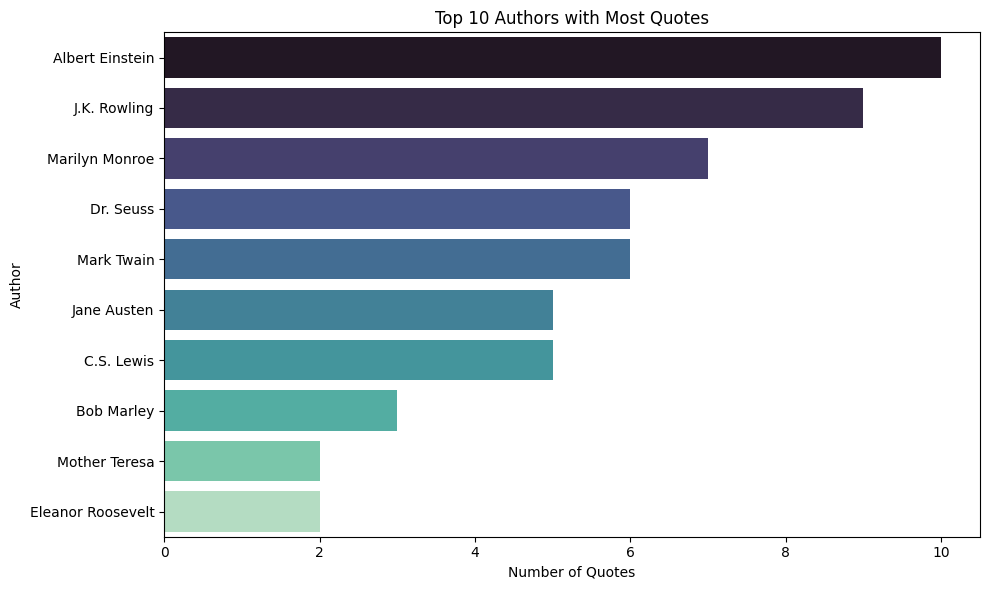

In [13]:
# Count quotes per author
author_counts = df['Author'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=author_counts.values, y=author_counts.index, palette='mako')
plt.title('Top 10 Authors with Most Quotes')
plt.xlabel('Number of Quotes')
plt.ylabel('Author')
plt.tight_layout()
plt.show()


<ipython-input-12-d6ea9760096f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(tags), palette='coolwarm')


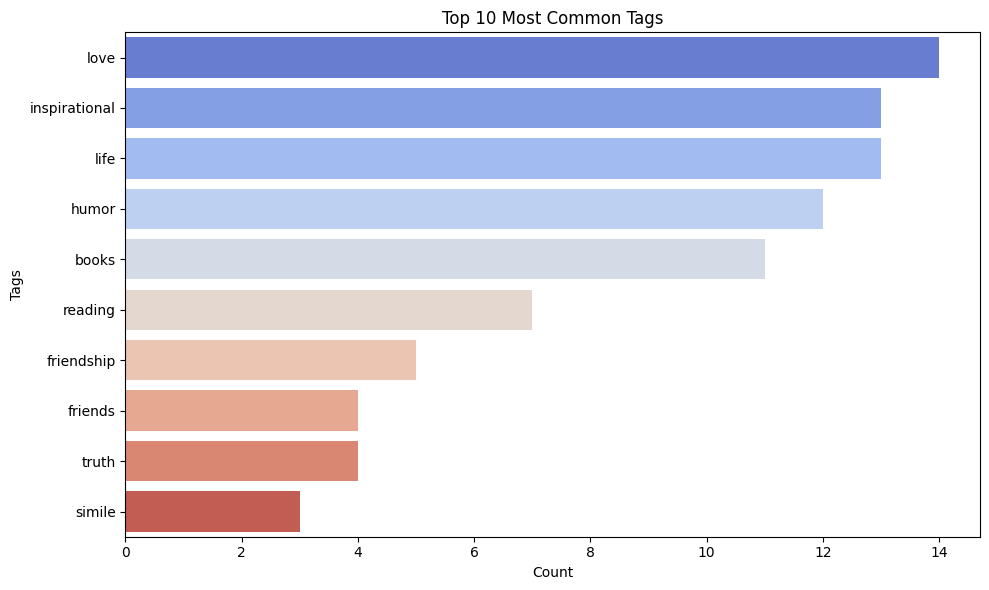

In [12]:
from collections import Counter

# Split and flatten tags
all_tags = df['Tags'].dropna().str.split(', ')
flat_tags = [tag for sublist in all_tags for tag in sublist]

# Count top tags
tag_counts = Counter(flat_tags).most_common(10)

# Plot
tags, counts = zip(*tag_counts)
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(tags), palette='coolwarm')
plt.title('Top 10 Most Common Tags')
plt.xlabel('Count')
plt.ylabel('Tags')
plt.tight_layout()
plt.show()


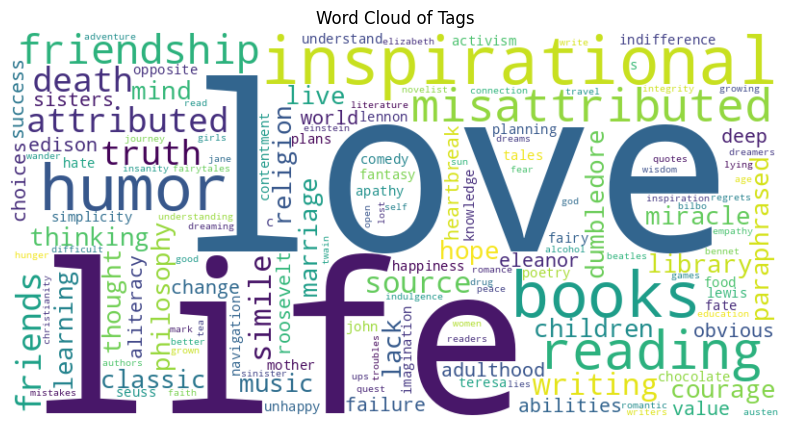

In [24]:
# Join all tags into one string
tags_text = ' '.join(flat_tags)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(tags_text)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Tags")
plt.show()


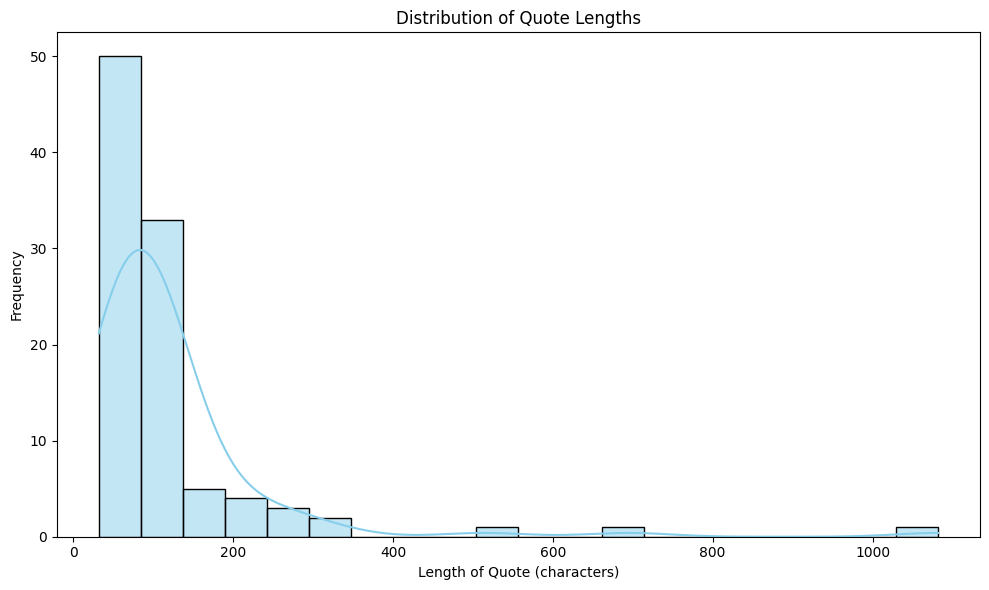

In [16]:
# Add a column for quote length
df['quote_length'] = df['Quote'].apply(lambda x: len(str(x)))

# Plot
plt.figure(figsize=(10,6))
sns.histplot(df['quote_length'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Quote Lengths')
plt.xlabel('Length of Quote (characters)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


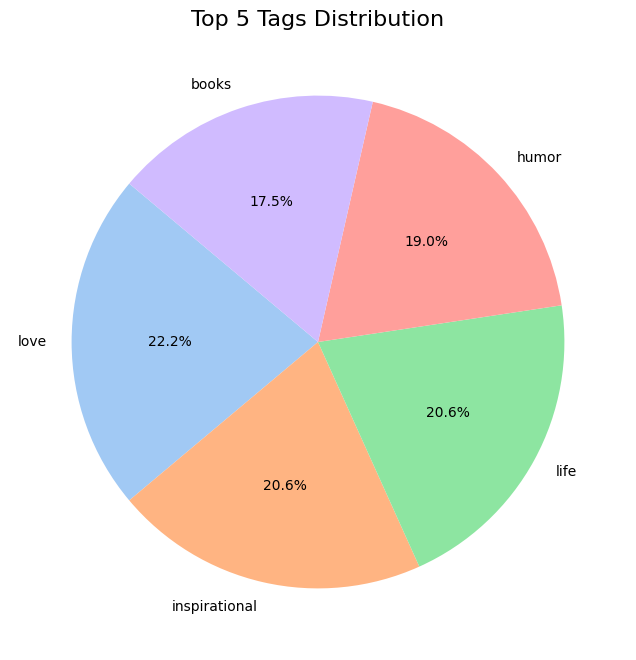

In [19]:
from collections import Counter
import pandas as pd

# Count top tags
tag_counts = Counter(flat_tags)
top_tags = pd.Series(tag_counts).sort_values(ascending=False)
top5_tags = top_tags.head(5)

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(top5_tags, labels=top5_tags.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 5 Tags Distribution', fontsize=16)
plt.show()
